
# 🌳 Mushroom Decision Tree — Super Beginner Version

This notebook is designed for **complete beginners**.  
You will:
1. Load the **mushrooms.csv** file.
2. Train a **Decision Tree** with almost no settings.
3. **Plot** the top part of the tree to see the rules.

> **Before you start**: put `mushrooms.csv` in the **same folder** as this notebook.


In [2]:

# 0) Install (if needed) and import libraries
# If you get ModuleNotFoundError, run:
# %pip install pandas scikit-learn matplotlib

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [3]:

# 1) Load data
df = pd.read_csv('mushrooms.csv')  # make sure this file exists locally
print("Shape:", df.shape)
df.head()


Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:

# 2) Split into features (X) and label (y)
y = df['class']          # 'e' (edible) or 'p' (poisonous)
X = df.drop(columns=['class'])

# Train / Test split (keep class balance similar across splits)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape, " Test size:", X_test.shape)


Train size: (6499, 22)  Test size: (1625, 22)


In [6]:

# 3) Super-simple pipeline: OneHot for all categorical columns + Decision Tree
cat_cols = X.columns.tolist()
preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Minimal Decision Tree (no tuning yet)
model = DecisionTreeClassifier(random_state=42)

pipe = Pipeline([('prep', preprocess), ('model', model)])
pipe.fit(X_train, y_train)

# Basic evaluation
pred = pipe.predict(X_test)
acc = accuracy_score(y_test, pred)
print(f"Accuracy: {acc:.4f}")


Accuracy: 1.0000


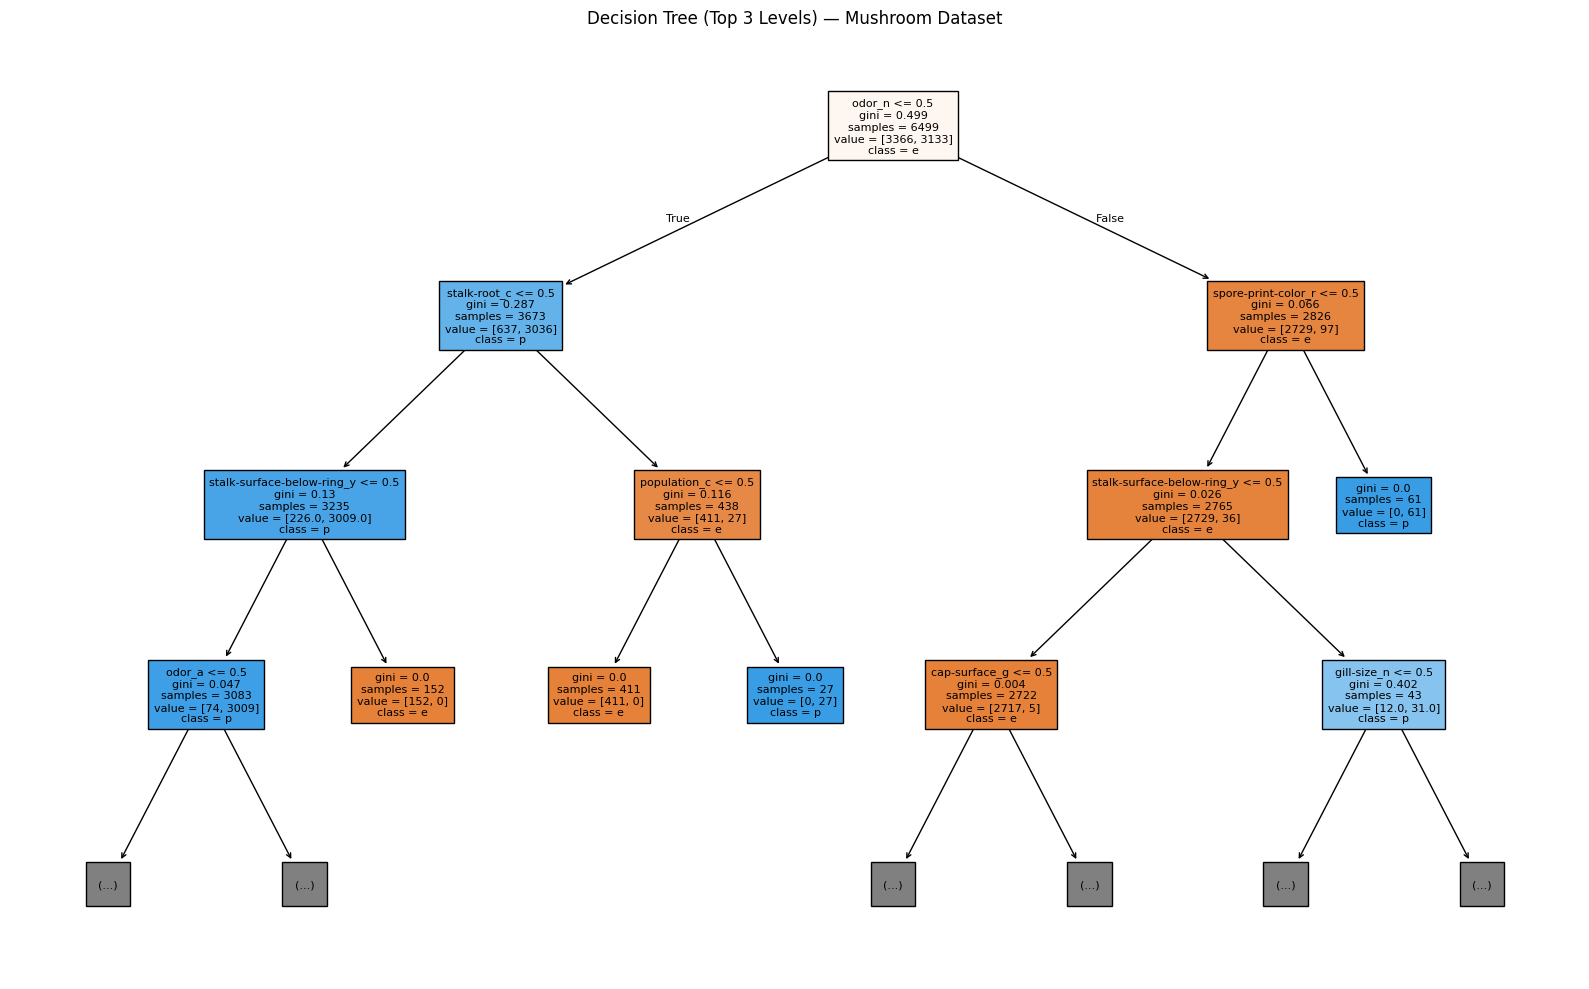

In [7]:

# 4) Plot the top levels of the tree (easy to read)
#    Note: We must pass the post-encoding feature names to plot meaningful splits.
oh = pipe.named_steps['prep'].named_transformers_['cat']
feature_names = oh.get_feature_names_out(cat_cols)

plt.figure(figsize=(16, 10))
plot_tree(
    pipe.named_steps['model'],
    max_depth=3,          # Only show first 3 levels for readability
    filled=True,
    fontsize=8,
    feature_names=feature_names,
    class_names=pipe.named_steps['model'].classes_
)
plt.title("Decision Tree (Top 3 Levels) — Mushroom Dataset")
plt.tight_layout()
plt.show()


In [ ]:

# 5) (Optional) Save the plotted tree to a PNG file
plt.figure(figsize=(16, 10))
plot_tree(
    pipe.named_steps['model'],
    max_depth=3,
    filled=True,
    fontsize=8,
    feature_names=feature_names,
    class_names=pipe.named_steps['model'].classes_
)
plt.title("Decision Tree (Top 3 Levels) — Mushroom Dataset")
plt.tight_layout()
plt.savefig('mushroom_tree_top3.png', dpi=150)
print("Saved figure to mushroom_tree_top3.png")
